# IMPORT

In [1]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix

from PIL import Image
from PIL import ImageOps



# INPUT

In [2]:
#Load Dataset
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
 #The MNIST dataset obtained using fetch_openml returns a Pandas DataFrame, and you are treating it as a NumPy array. To fix this issue, you need to convert the DataFrame to a NumPy array.
X,y=mnist["data"].to_numpy(),mnist["target"].to_numpy()

In [4]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
print(y)

['5' '0' '4' ... '4' '5' '6']


In [6]:
print(X.shape)
print(y.shape) 
#70000 images and each image has 784(28*28 pixels) features

(70000, 784)
(70000,)


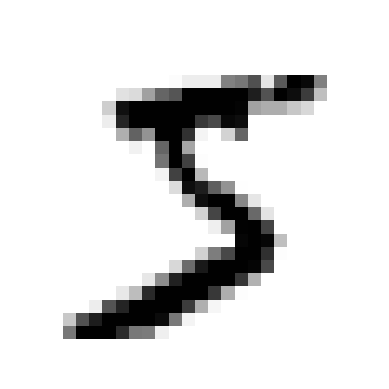

In [7]:
#peak into dataset
some_digit = X[0]
#reshapes image into 28*28 matrix
some_digit_image=some_digit.reshape(28,28) 
#with binary colormap
plt.imshow(some_digit_image,cmap="binary") 
plt.axis("off")
plt.show()

In [8]:
#Note: The label is a string . Therefore cast y to integer
y=y.astype(np.uint8)

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
print(y_train)

[0 4 4 ... 1 0 0]


In [11]:
print(y_test)

[8 4 8 ... 2 4 5]


# MODEL

In [12]:
# Function to find the best k value using the elbow approach
def find_best_k(X_train, y_train, X_test, y_test):
    # List to store accuracies for different k values
    accuracies = [] 
    
    k_values = range(1, 10)  # You can adjust the range based on your computational resources

    for k in k_values:

        # Create a KNN classifier with k value
        knn = KNeighborsClassifier(n_neighbors=k) 

        # Train the classifier on training data
        knn.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = knn.predict(X_test)

        # Calculate accuracy of predictions
        accuracy = accuracy_score(y_test, y_pred)

        # Append accuracy to the list
        accuracies.append(accuracy)
        print(f"k = {k}, Accuracy = {accuracy}")


    # Plot the accuracies for different k values
    plt.plot(k_values, accuracies, marker='o')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('Elbow Method for Choosing Optimal k')
    plt.show()

    # Find the best k value based on the highest accuracy
    best_k = k_values[accuracies.index(max(accuracies))]
    return best_k

k = 1, Accuracy = 0.9706190476190476
k = 2, Accuracy = 0.963
k = 3, Accuracy = 0.9697619047619047
k = 4, Accuracy = 0.9681904761904762
k = 5, Accuracy = 0.9684285714285714
k = 6, Accuracy = 0.967047619047619
k = 7, Accuracy = 0.9663809523809523
k = 8, Accuracy = 0.965952380952381
k = 9, Accuracy = 0.9650952380952381


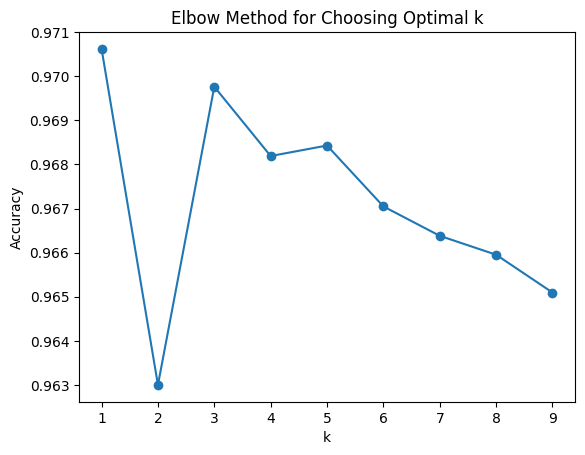

The best value of k is: 1


In [13]:
# Find the best k value
best_k = find_best_k(X_train, y_train, X_test, y_test)
print(f"The best value of k is: {best_k}")

In [14]:
# Train the model with the best k value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [15]:
# Predict on the test set
y_pred_best = knn_best.predict(X_test)
y_pred_best

array([8, 4, 8, ..., 2, 4, 5], dtype=uint8)

In [16]:
# Calculate the accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with k = {best_k}: {accuracy_best}")

Accuracy with k = 1: 0.9706190476190476


In [17]:
#Calculate the confusion Matrix
print("Confusion Matrix :", confusion_matrix(y_test,y_pred_best))

Confusion Matrix : [[2041    0    4    0    1    2    6    2    1    1]
 [   0 2349    5    2    2    0    0    5    0    1]
 [  14   18 2046   10    2    1    5   27    7    3]
 [   0    2   15 2098    0   28    0   10   11   12]
 [   1   10    1    0 1868    1    5    5    1   44]
 [   2    4    0   23    5 1852   15    0    9    5]
 [   9    3    0    0    4    8 2061    0    2    1]
 [   1   20    4    2    8    0    0 2193    1   19]
 [   6   15    8   27    5   28    8    6 1871   18]
 [   7    8    2    9   32    4    2   22    0 2004]]


# OUTPUT

In [18]:
# Function to preprocess user input image
def preprocess_input_image(image_path):
    # Open the image file
    img = Image.open(image_path)
    img = ImageOps.invert(img)

    # Convert the image to grayscale
    img = img.convert('L')
    # Resize the image to 28x28 (MNIST dataset format)
    img = img.resize((28, 28))
    # Convert image to numpy array
    img_array = np.array(img)
    # Flatten the image array
    img_array = img_array.reshape(1, -1)

    return img_array

In [19]:
image_path=input("Enter the path to image:")
input_image = preprocess_input_image(image_path)
# Make prediction using KNN classifier
predicted_digit = knn_best.predict(input_image)
print("Predicted digit: ", predicted_digit[0])

AttributeError: 'str' object has no attribute 'read'